# import packages and files

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot

In [4]:
train=pd.read_csv(r'C:\Users\Lu\OneDrive - North Carolina State University\MSA studies\AA502\Machine Learning\project\MLProject_train.csv')

In [19]:
valid=pd.read_csv(r'C:\Users\Lu\OneDrive - North Carolina State University\MSA studies\AA502\Machine Learning\project\MLProject_valid.csv')

In [7]:
train.info(),valid.info() #all variables are either float or int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483087 entries, 0 to 483086
Columns: 150 entries, A1 to target2
dtypes: float64(135), int64(15)
memory usage: 552.8 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 150 entries, A1 to target2
dtypes: float64(133), int64(17)
memory usage: 68.7 MB


(None, None)

In [8]:
#inspect the categorical Z2
train['Z2'].describe()   #it's float in python

count    483087.000000
mean          3.030347
std           1.419200
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Z2, dtype: float64

In [12]:
train.iloc[:,-2:]

,target1,target2
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0
...,...,...
483082,0,1
483083,0,0
483084,0,1
483085,0,0


# Prep the data

## save targets to labels

In [8]:
# Labels are the values we want to predict
labels = train.loc[:,'target1': 'target2']



In [9]:
labels

,target1,target2
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0
...,...,...
483082,0,1
483083,0,0
483084,0,1
483085,0,0


## Remove target from train

In [24]:
#remove target variable from the dataset

train= train.drop(['target1', 'target2'], axis = 1)

train.shape

(483087, 148)

In [53]:
# Saving column names for later use
train_list = list(train.columns)
# Convert to numpy array
train_list_array = np.array(train_list)

## Remove target from valid

In [20]:
labels_valid=valid.loc[:,'target1': 'target2']

In [21]:
valid= valid.drop(['target1', 'target2'], axis = 1)
valid.shape

(60000, 148)

In [22]:
# Saving column names for later use
valid_list = list(valid.columns)
# Convert to numpy array
valid_list_array = np.array(valid_list)

# Data Cleaning

## Impute missing values for training

In [27]:
#check for missing values
def missing_df(df):
    missing_df=pd.DataFrame(df.apply(lambda x:sum(x.isnull())/len(df)))
    missing_df.columns=['pct_missing']
    missing_df=missing_df.sort_values(by='pct_missing', ascending=False)
    return missing_df

In [26]:
missing=missing_df(train)

In [27]:
missing.head(20)

,pct_missing
X6,0.000807
T6,0.000807
L6,0.000807
N6,0.000807
M6,0.000807
U6,0.000807
V6,0.000807
W6,0.000807
Z4,0.000000
T4,0.000000


In [29]:
sum(missing['pct_missing']!=0) #eight variables have missing values

8

In [32]:
#impute for missing values
#investigate the eight missing values first
col_missing=missing.loc[missing['pct_missing']!=0,:]
#col_missing=missing.columns(missing['pct_missing']!=0)

In [33]:
col_missing=col_missing.index

In [34]:
col_missing

Index([], dtype='object')

In [35]:
#select those variables from training
train_missing=train.loc[:,col_missing]

In [38]:
train_missing.describe() #nothing out of ordinary, could impute with mean...

,X6,T6,L6,N6,M6,U6,V6,W6
count,482697.000000,482697.000000,482697.000000,482697.000000,482697.000000,482697.000000,482697.000000,482697.000000
mean,0.080901,0.091058,0.143021,0.145081,0.147141,0.145260,0.150237,0.147749
std,0.034916,0.042545,0.040677,0.040592,0.042429,0.037008,0.038462,0.036941
min,-0.025900,-0.041500,0.073900,0.082200,0.074900,0.083500,0.084600,0.086700
25%,0.058200,0.063200,0.116700,0.118600,0.119600,0.120800,0.125400,0.123700
50%,0.081800,0.091400,0.133000,0.134800,0.136700,0.136400,0.140100,0.138400
75%,0.103000,0.118200,0.157700,0.158400,0.160600,0.159200,0.161600,0.160000
max,0.212600,0.294700,0.337900,0.407400,0.477000,0.321000,0.433700,0.377300


In [36]:
#impute missing variables in train with mean
train_nomissing=train.apply(lambda x: x.fillna(x.mean()))

In [44]:
train_nomissing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483087 entries, 0 to 483086
Columns: 148 entries, A1 to X6
dtypes: float64(135), int64(13)
memory usage: 545.5 MB


In [45]:
train_nomissing.loc[:,col_missing].info()  #confirm that missing values are being imputed. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483087 entries, 0 to 483086
Data columns (total 8 columns):
X6    483087 non-null float64
T6    483087 non-null float64
L6    483087 non-null float64
N6    483087 non-null float64
M6    483087 non-null float64
U6    483087 non-null float64
V6    483087 non-null float64
W6    483087 non-null float64
dtypes: float64(8)
memory usage: 29.5 MB


In [46]:
#=missing_df(train_nomissing)

In [47]:
#sum(missing['pct_missing']!=0)

0

## impute missing values for valid

In [28]:
missing=missing_df(valid)

In [29]:
missing
 #non-missing good!

,pct_missing
A1,0.0
T4,0.0
V4,0.0
W4,0.0
X4,0.0
...,...
Z2,0.0
A3,0.0
B3,0.0
C3,0.0


## Feature scaling

In [30]:
from sklearn.preprocessing import StandardScaler


In [37]:
scaler = StandardScaler() #scale to ensure models are properly trained. 
scaled_train = scaler.fit_transform(train_nomissing)


In [38]:
scaled_valid = scaler.fit_transform(valid)

In [54]:
scaled_train=pd.DataFrame(scaled_train) #from array to dataframe
scaled_train.columns=train_list  #put back column names

In [55]:
scaled_train.head()

,A1,B1,C1,D1,E1,F1,G1,H1,I1,J1,...,N6,P6,Q6,R6,S6,T6,U6,V6,W6,X6
0,-0.066579,-0.934318,-0.469450,-0.506597,-0.133234,0.070210,-0.013717,-0.109775,-0.950130,0.783375,...,-0.835023,-0.916355,-0.643895,-0.627935,-0.766902,0.487725,-0.745009,-0.963339,-0.876038,0.249252
1,0.666044,-0.765331,-0.047211,-0.170278,0.405617,0.048964,-0.132080,-0.187295,1.461399,-0.743244,...,0.301141,0.276562,-0.010507,0.070777,-0.068686,0.974465,0.363311,0.220123,0.296575,0.896785
2,-0.702470,-1.016280,-0.072957,-0.173203,0.328610,-0.023910,-0.022903,-0.032251,-0.827062,0.864728,...,-0.260779,-0.350174,-0.235418,-0.367725,-0.287302,0.948599,-0.455765,-0.320888,-0.393994,0.722009
3,-0.511930,-0.785557,0.385326,0.584245,-0.086259,-0.036840,0.022922,-0.118640,1.260840,-0.886362,...,0.192700,0.767050,0.350012,0.878713,0.502427,0.210260,0.106505,0.053658,0.079926,0.140374
4,-0.685550,-1.017819,-0.139897,-0.290183,0.417981,-0.032922,-0.084394,-0.037241,1.420166,-1.081221,...,-0.263244,-0.335035,-0.131231,-0.293838,-0.287302,-0.276479,-0.685538,-0.175231,-0.434616,-0.475643


# Establish a baseline model

In [44]:
# The baseline model is the logistic regression
from sklearn.linear_model import LogisticRegression

In [45]:
log_reg = LogisticRegression(solver='lbfgs')


C:\Users\Lu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
 from sklearn.metrics import precision_score

log_reg.fit(scaled_train, labels.iloc[:,0]) #use target1
logreg_predictions1 = log_reg.predict(scaled_valid)
log_acc1 = precision_score(labels_valid.iloc[:,0], logreg_predictions1)
log_acc1  #baseline accuracy on target1


C:\Users\Lu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.48263769511105

In [87]:
log_reg2 = LogisticRegression(solver='lbfgs')
log_reg2.fit(scaled_train, labels.iloc[:,1]) #predict target2
logreg_predictions1 = log_reg2.predict(scaled_valid)
log_acc2 = precision_score(labels_valid.iloc[:,1], logreg_predictions1)
log_acc2 #baseline roc on target2

C:\Users\Lu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.4188333903523777

# Gradient boosting

In [84]:
from sklearn.tree import DecisionTreeRegressor
tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X, y)

NameError: name 'X' is not defined

# XGboost 
https://xgboost.readthedocs.io/en/latest/tutorials/index.html

In [73]:
#conda install -c anaconda py-xgboost
import xgboost as xgb

In [12]:
target1=labels.iloc[:,0]
target2=labels.iloc[:,1]

In [41]:
valid_target1=labels_valid.iloc[:,0]
valid_target2=labels_valid.iloc[:,1]

In [90]:
model1 = xgb.XGBClassifier()
# model2 = xgb.XGBClassifier(n_estimators=100, max_depth=4, learning_rate=0.1, subsample=0.8)

train_model1 = model1.fit(scaled_train, target1)
# train_model2 = model2.fit(train, target1, early_stopping_rounds=10)  # should I used scaled_train here?

XGBoostError: [18:07:05] src/learner.cc:180: XGBoost version not compiled with GPU support.

## plot log_loss

In [61]:
aeval_set = [(scaled_train,target1), (scaled_valid, valid_target1)]
train_model3=model1.fit(scaled_train, target1, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)
# model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

results =model1.evals_result()  #retrieve model details for plots

[0]	validation_0-error:0.155367	validation_0-logloss:0.640392	validation_1-error:0.2237	validation_1-logloss:0.650212
[1]	validation_0-error:0.152614	validation_0-logloss:0.596738	validation_1-error:0.222183	validation_1-logloss:0.615781
[2]	validation_0-error:0.147216	validation_0-logloss:0.561399	validation_1-error:0.222183	validation_1-logloss:0.587604
[3]	validation_0-error:0.147216	validation_0-logloss:0.529945	validation_1-error:0.222183	validation_1-logloss:0.565166
[4]	validation_0-error:0.147216	validation_0-logloss:0.506128	validation_1-error:0.222183	validation_1-logloss:0.546894
[5]	validation_0-error:0.147216	validation_0-logloss:0.48312	validation_1-error:0.222183	validation_1-logloss:0.531586
[6]	validation_0-error:0.147185	validation_0-logloss:0.465173	validation_1-error:0.221867	validation_1-logloss:0.518698
[7]	validation_0-error:0.146953	validation_0-logloss:0.449283	validation_1-error:0.22195	validation_1-logloss:0.507911
[8]	validation_0-error:0.146953	validation_0

[69]	validation_0-error:0.14279	validation_0-logloss:0.325084	validation_1-error:0.2182	validation_1-logloss:0.472776
[70]	validation_0-error:0.142732	validation_0-logloss:0.324857	validation_1-error:0.2185	validation_1-logloss:0.472338
[71]	validation_0-error:0.14237	validation_0-logloss:0.324579	validation_1-error:0.218567	validation_1-logloss:0.472314
[72]	validation_0-error:0.14225	validation_0-logloss:0.324395	validation_1-error:0.218983	validation_1-logloss:0.472412
[73]	validation_0-error:0.142148	validation_0-logloss:0.324076	validation_1-error:0.219367	validation_1-logloss:0.472552
[74]	validation_0-error:0.141896	validation_0-logloss:0.323927	validation_1-error:0.219667	validation_1-logloss:0.471928
[75]	validation_0-error:0.142049	validation_0-logloss:0.32375	validation_1-error:0.2192	validation_1-logloss:0.471724
[76]	validation_0-error:0.142003	validation_0-logloss:0.323432	validation_1-error:0.219017	validation_1-logloss:0.471752
[77]	validation_0-error:0.141985	validatio

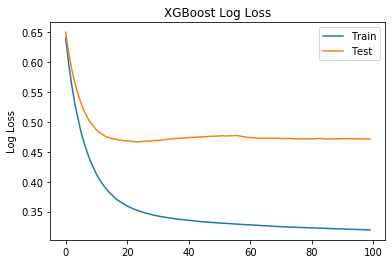

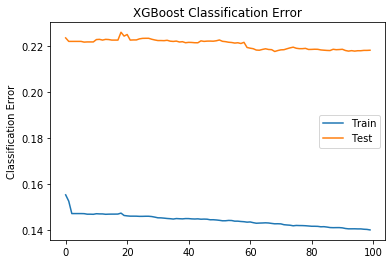

In [66]:
# retrieve performance metrics
results = train_model3.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

# it looks like there is an opportunity to stop the learning early, perhaps somewhere around epoch 20.
# a similar story for classification error, where error appears to go back up at around epoch 40.

In [91]:
#from sklearn.metrics import classification_report

#pred1 = train_model1.predict(scaled_valid)
#pred2 = train_model2.predict(valid)



In [47]:
pred3 = train_model3.predict(scaled_valid)

In [85]:
# sklearn.metrics import accuracy_score

print("Accuracy for model 1: %.2f" % (accuracy_score(valid_target1, pred1) * 100))
print("Precision for model2: %.2f" % (precision_score(valid_target1, pred2) * 100))
print("Accuracy for model 2: %.2f" % (accuracy_score(valid_target1, pred2) * 100))
print("Precision for model2: %.2f" % (precision_score(valid_target1, pred3) * 100))
print("Accuracy for model 3: %.2f" % (accuracy_score(valid_target1, pred3) * 100))
print("Precision for model2: %.2f" % (precision_score(valid_target1, pred3) * 100))


Accuracy for model 1: 77.68
Precision for model2: 55.12
Accuracy for model 2: 77.36
Precision for model2: 61.68
Accuracy for model 3: 78.17
Precision for model2: 61.68


## param tuning

In [77]:

model4 = xgb.XGBClassifier(verbosity, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.5,
                      objective='binary:logistic', 
                      n_estimators=40, #get the number from above train_model3
                      reg_alpha = 0.3,
                      max_depth=4, 
                      gamma=10 #the larger the gamma the more conservative the model is)

In [78]:
train_model4=model4.fit(scaled_train, target1, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)
# model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

results =model4.evals_result()

[0]	validation_0-error:0.150271	validation_0-logloss:0.688635	validation_1-error:0.240933	validation_1-logloss:0.688576
[1]	validation_0-error:0.149859	validation_0-logloss:0.682653	validation_1-error:0.240467	validation_1-logloss:0.68423
[2]	validation_0-error:0.150045	validation_0-logloss:0.67691	validation_1-error:0.23915	validation_1-logloss:0.680048
[3]	validation_0-error:0.150128	validation_0-logloss:0.671196	validation_1-error:0.239333	validation_1-logloss:0.675678
[4]	validation_0-error:0.149366	validation_0-logloss:0.666308	validation_1-error:0.225267	validation_1-logloss:0.671392
[5]	validation_0-error:0.149679	validation_0-logloss:0.661518	validation_1-error:0.236017	validation_1-logloss:0.66753
[6]	validation_0-error:0.149673	validation_0-logloss:0.655686	validation_1-error:0.236033	validation_1-logloss:0.663651
[7]	validation_0-error:0.149778	validation_0-logloss:0.65154	validation_1-error:0.23585	validation_1-logloss:0.659595
[8]	validation_0-error:0.149805	validation_0-l

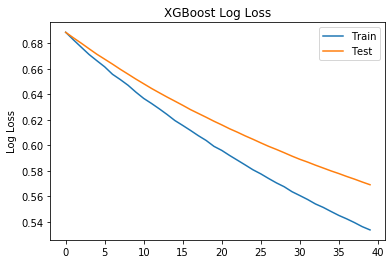

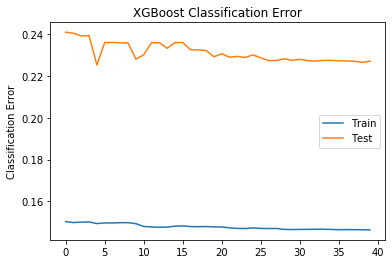

In [79]:
# retrieve performance metrics
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

In [81]:
#accuracy
pred4 = train_model4.predict(scaled_valid)
print("Accuracy for model4: %.2f" % (accuracy_score(valid_target1, pred4) * 100))

Accuracy for model4: 77.29


In [82]:
from sklearn.metrics import precision_score

print("Precision for model4: %.2f" % (precision_score(valid_target1, pred4) * 100))

Precision for model4: 69.53


In [64]:
from sklearn.model_selection import GridSearchCV

param_test = {
 'max_depth':6
 'min_child_weight':11
}
gsearch = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate=0.1, n_estimators=100, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
param_grid = param_test, scoring='precision',n_jobs=4,iid=False, cv=5)


# grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
# scoring='neg_mean_squared_error')

# gsearch.best_params_


NameError: name 'forest_reg' is not defined

In [103]:
# from sklearn.model_selection import StratifiedKFold
# from xgboost import XGBClassifier
# from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
params = {
        'min_child_weight': [5],
        'gamma': [1],
        'subsample': [0.5],
        'colsample_bytree': [0.6],
        'max_depth':[4]
        }

xgb =XGBClassifier(learning_rate=0.02, n_estimators=200, objective='binary:logistic',
                    silent=True, nthread=1)
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='precision', n_jobs=4, cv=skf.split(scaled_train, target1), verbose=3, random_state=1001 )

In [ ]:
random_search.fit(scaled_train, target1)

C:\Users\Lu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 1 is smaller than n_iter=5. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


In [65]:
# train_model4 = gsearch.fit(scaled_train, target1)
# pred4 = train_model4.predict(scaled_valid)
# print("Accuracy for model 4: %.2f" % (accuracy_score(valid_target1, pred4) * 100))

## Cross-validation in XGBoost (not sure how it works....)

In [16]:
train_dmatrix = xgb.DMatrix(train, label=labels.iloc[:,0])
params={"objective":"binary:logistic","max_depth":4}
cv_results = xgb.cv(dtrain=train_dmatrix, params=params, nfold=4,
num_boost_round=10, metrics="auc", as_pandas=True)  #measuring AUC
#print("Accuracy: %f" %((1-cv_results["test-error-mean"]).iloc[-1]))

In [18]:
cv_results['test-auc-mean'].mean()

0.8230641750000001

### fine tune the model

Eta and overfitting: https://mlexplained.com/2018/01/29/learning-rate-tuning-in-deep-learning-a-practical-guide/
